In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from wordcloud import WordCloud

In [ ]:
# Load the IMDB dataset
from tensorflow.keras.datasets import imdb

# Set vocabulary size
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Word index mapping
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

# Convert tokenized reviews to actual words
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Print a sample decoded review
print("Sample decoded review:")
print(decode_review(x_train[0]))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Sample decoded review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children

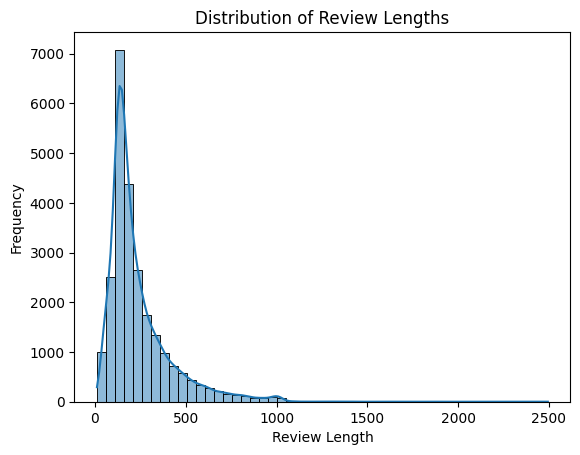

In [ ]:
# Data exploration
review_lengths = [len(review) for review in x_train]
sns.histplot(review_lengths, bins=50, kde=True)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

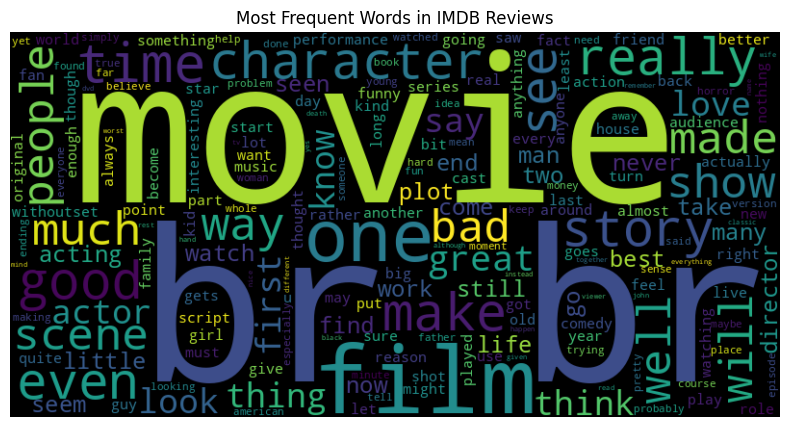

In [ ]:
# Create word cloud of frequent words
all_words = ' '.join([decode_review(review) for review in x_train[:1000]])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in IMDB Reviews')
plt.show()

In [ ]:
# Padding sequences
max_length = 250
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 285s 715ms/step - accuracy: 0.5332 - loss: 0.6878 - val_accuracy: 0.5860 - val_loss: 0.6537
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 309s 682ms/step - accuracy: 0.6523 - loss: 0.6122 - val_accuracy: 0.6007 - val_loss: 0.6246
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 316s 667ms/step - accuracy: 0.7921 - loss: 0.4930 - val_accuracy: 0.7932 - val_loss: 0.5023
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 228s 583ms/step - accuracy: 0.8316 - loss: 0.4275 - val_accuracy: 0.7747 - val_loss: 0.5202
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 294s 666ms/step - accuracy: 0.8290 - loss: 0.4338 - val_accuracy: 0.7972 - val_loss: 0.5111


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.7952 - loss: 0.5179
Test Accuracy: 0.7972


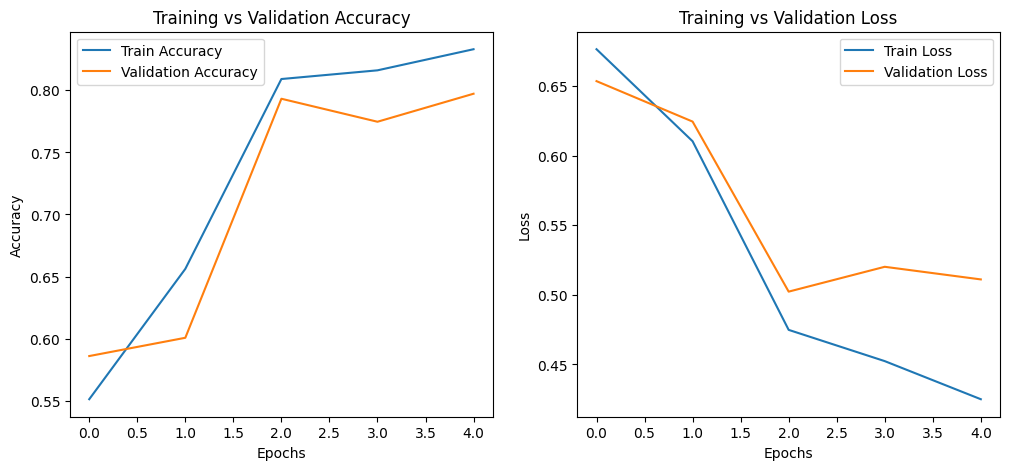

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step


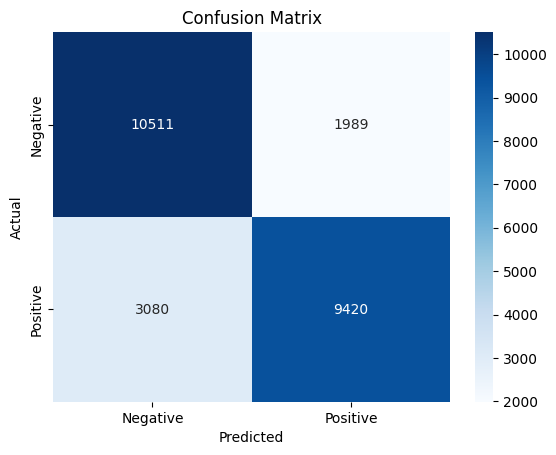

In [ ]:
# Confusion matrix
y_pred = (model.predict(x_test) > 0.5).astype('int32')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step


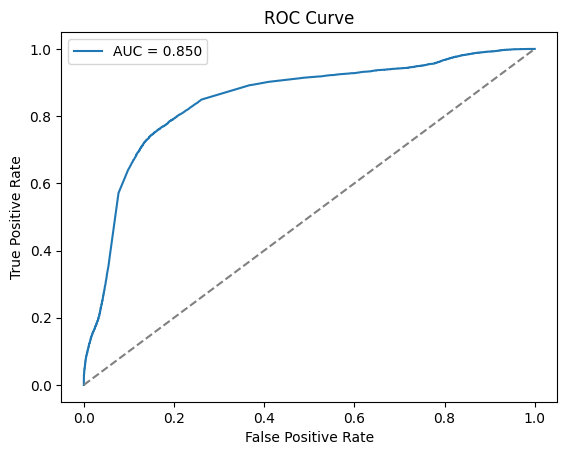

In [ ]:
# ROC curve
y_pred_prob = model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81     12500
           1       0.83      0.75      0.79     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000

